<a target="_blank" href="https://colab.research.google.com/github/RUTIK675LT/DataMining_Dimensionality_Reduction/blob/master/Task%202/2_UMap.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [3]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=44cf6dc0fea53090e6aaee490bed6b54fb7e783e839078dd6d9ac5db7d5f65a9
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


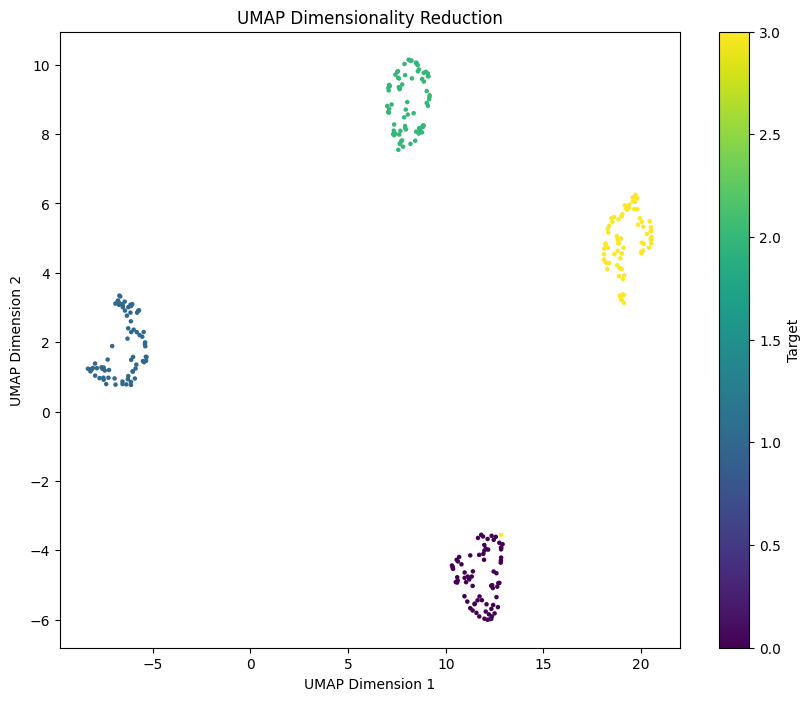

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP

# Load the dataset
file_path = '/content/umap_dataset.csv'  # Replace with the path to your uploaded file
df = pd.read_csv(file_path)

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Apply UMAP
umap_model = UMAP(n_neighbors=15, n_components=2, metric='euclidean')
data_reduced = umap_model.fit_transform(X)

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=y, cmap='viridis', s=5)
plt.title('UMAP Dimensionality Reduction')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Target')
plt.show()


In [5]:
!pip install scikit-learn

In [6]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Classification Accuracy: 0.9888888888888889


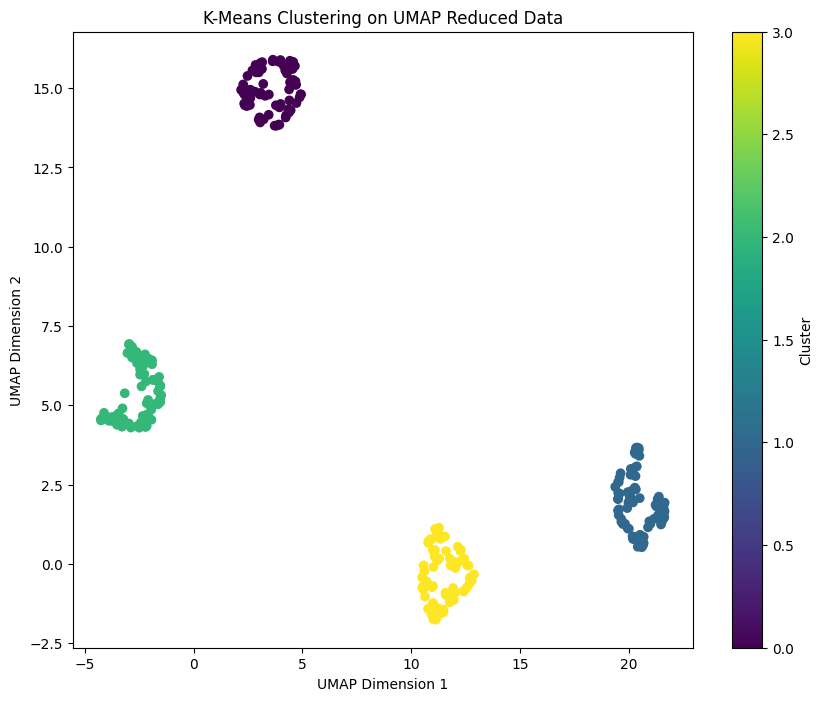

In [7]:
# Load the dataset
file_path = '/content/umap_dataset.csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=15, n_components=2, metric='euclidean')
X_reduced = umap_model.fit_transform(X)

# Apply K-Means clustering on the reduced data
kmeans = KMeans(n_clusters=4)  # Assuming 4 clusters; adjust as needed
clusters = kmeans.fit_predict(X_reduced)

# Combine original features with clusters
X_combined = pd.concat([pd.DataFrame(X), pd.Series(clusters, name='Cluster')], axis=1)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy}")

# Visualization of clustering results
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering on UMAP Reduced Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cluster')
plt.show()